In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from plotly.subplots import make_subplots

In [ ]:
#import fredapi key
from fredapi import Fred

from dotenv import load_dotenv
import os

#Load variables from .env
load_dotenv() 
fred_key = os.getenv("FRED_API_KEY")

#create fred object
fred = Fred(api_key=fred_key)

- Plot uneployment rate alongside labor force participation rate to see how both correlate with each other.

In [4]:
fred.search('unemployment rate')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-11-15,2024-11-15,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-11-15,2024-11-15,Unemployment Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:03-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-11-15,2024-11-15,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:04-05:00,72,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2024-11-15,2024-11-15,Unemployment Rate - Black or African American,1972-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:20-05:00,23,The series comes from the 'Current Population ...
NROU,NROU,2024-11-15,2024-11-15,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRUN74TTDKQ156N,LRUN74TTDKQ156N,2024-11-15,2024-11-15,Infra-Annual Labor Statistics: Unemployment Ra...,1995-01-01,2024-04-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-10-15 13:55:09-05:00,5,OECD Data Filters: REF_AREA: DNK MEASURE: UNE...
WICH620UR,WICH620UR,2024-11-15,2024-11-15,"Unemployment Rate in Wichita, KS (MSA)",1990-01-01,2024-09-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-10-30 13:31:06-05:00,5,None
CNERURN,CNERURN,2024-11-15,2024-11-15,Unemployment Rate in Northeast Census Region,1976-01-01,2024-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-10-23 21:54:21-05:00,5,None


In [5]:
unemp = fred.get_series('UNRATE', observation_start='2019-01-01', observation_end='2024-10-01')
unemp

2019-01-01    4.0
2019-02-01    3.8
2019-03-01    3.8
2019-04-01    3.7
2019-05-01    3.6
             ... 
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
2024-09-01    4.1
2024-10-01    4.1
Length: 70, dtype: float64

In [6]:
part_rate = fred.get_series('CIVPART', observation_start='2019-01-01', observation_end='2024-10-01')
part_rate

2019-01-01    63.1
2019-02-01    63.1
2019-03-01    63.0
2019-04-01    62.8
2019-05-01    62.9
              ... 
2024-06-01    62.6
2024-07-01    62.7
2024-08-01    62.7
2024-09-01    62.7
2024-10-01    62.6
Length: 70, dtype: float64

In [7]:
merged_df = pd.concat([unemp, part_rate], axis=1, join='inner')
merged_df

,0,1
2019-01-01,4.0,63.1
2019-02-01,3.8,63.1
2019-03-01,3.8,63.0
2019-04-01,3.7,62.8
2019-05-01,3.6,62.9
...,...,...
2024-06-01,4.1,62.6
2024-07-01,4.3,62.7
2024-08-01,4.2,62.7
2024-09-01,4.1,62.7


In [8]:
merged_df = merged_df.rename(columns={0:'Unemployment', 1: 'LFPR'})
merged_df


,Unemployment,LFPR
2019-01-01,4.0,63.1
2019-02-01,3.8,63.1
2019-03-01,3.8,63.0
2019-04-01,3.7,62.8
2019-05-01,3.6,62.9
...,...,...
2024-06-01,4.1,62.6
2024-07-01,4.3,62.7
2024-08-01,4.2,62.7
2024-09-01,4.1,62.7


In [30]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Labour Force Participation Rate", "Unemployment Rate"), vertical_spacing=0.15)

plot1 = px.line(merged_df, x=merged_df.index, y='LFPR')
fig.add_trace(plot1['data'][0], row=1, col=1)


plot2 = px.line(merged_df, x=merged_df.index, y='Unemployment')
fig.add_trace(plot2['data'][0], row=2, col=1)

fig.update_layout(
    height=800,  # Adjust the height
    width=850,   # Adjust the width
    title_text="Labour Force Participation Rate vs Unemployment Rate",
    yaxis_tickformat=''
)

fig.update_yaxes(ticksuffix="%", row=1, col=1)  # Set percentage format for both y-axes
fig.update_yaxes(ticksuffix="%", row=2, col=1) 

fig.show()

#plot1 is a Plotly Express figure object created using px.line, px.bar, etc.
#The ['data'] property of a Plotly figure contains a list of all the traces (or individual plots) within that figure.
#[0] selects the first trace from plot1 (since most Plotly Express figures contain only one trace by default). 

#plot1['data'][0] extracts the first trace from plot1.
#add_trace adds that trace to a specific position in the subplot grid (row=1, col=1 in this case).



![Labour participation rate vs unemployment](Images/lfpr_unemp.png)

## Are there notable demographic shifts in labor force participation (e.g., aging workforce, gender disparities)?

In [56]:
LFPR_results = fred.search('Labour Force Participation Rate')
LFPR_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-11-14,2024-11-14,Labor Force Participation Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:02-05:00,84,The series comes from the 'Current Population ...
LNU01300000,LNU01300000,2024-11-14,2024-11-14,Labor Force Participation Rate,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:16-05:00,27,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-11-14,2024-11-14,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:07-05:00,70,The series comes from the 'Current Population ...
LNU01300060,LNU01300060,2024-11-14,2024-11-14,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-11-01 07:46:06-05:00,41,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-11-14,2024-11-14,Labor Force Participation Rate - Women,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:11-05:00,66,To obtain estimates of women worker employment...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRAC24TTPLQ156S,LRAC24TTPLQ156S,2024-11-14,2024-11-14,Infra-Annual Labor Statistics: Labor Force Par...,2000-01-01,2024-04-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-10-15 13:53:59-05:00,1,OECD Data Filters: REF_AREA: POL MEASURE: LF_...
LRAC24TTPLA156N,LRAC24TTPLA156N,2024-11-14,2024-11-14,Infra-Annual Labor Statistics: Labor Force Par...,2000-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-07-15 14:04:36-05:00,1,OECD Data Filters: REF_AREA: POL MEASURE: LF_...
LRIN24MANLQ156S,LRIN24MANLQ156S,2024-11-14,2024-11-14,Infra-Annual Labor Statistics: Inactivity Rate...,2000-01-01,2024-04-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-10-15 13:53:29-05:00,1,OECD Data Filters: REF_AREA: NLD MEASURE: OLF...


In [64]:
titles = ['Labor Force Participation Rate - 16-19 Yrs.', 'Labor Force Participation Rate - 20-24 Yrs.', 'Labor Force Participation Rate - 25-54 Yrs.', 'Labor Force Participation Rate - 55 Yrs. & over' ]

In [67]:
filtered_results = LFPR_results[(LFPR_results['title'].isin(titles)) & (LFPR_results['seasonal_adjustment'] == 'Seasonally Adjusted')]
filtered_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS11300060,LNS11300060,2024-11-14,2024-11-14,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:07-05:00,70,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-11-14,2024-11-14,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:14-05:00,54,The series comes from the 'Current Population ...
LNS11300012,LNS11300012,2024-11-14,2024-11-14,Labor Force Participation Rate - 16-19 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:15-05:00,49,The series comes from the 'Current Population ...
LNS11300036,LNS11300036,2024-11-14,2024-11-14,Labor Force Participation Rate - 20-24 Yrs.,1948-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-01 07:47:18-05:00,39,The series comes from the 'Current Population ...


In [103]:
indices= {
    'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
    'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
    'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
    'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.' 
}

In [129]:
series_list=[]

for i, (code, label) in enumerate(indices.items()):
    results = fred.get_series(code, observation_start='2019-01-01', observation_end='2024-10-01')
    results = results.to_frame(name=label)
    series_list.append(results)

In [130]:
series_list[1]

,Labor Force Participation Rate - 55 Yrs. & over
2019-01-01,40.2
2019-02-01,40.4
2019-03-01,40.0
2019-04-01,40.0
2019-05-01,40.0
...,...
2024-06-01,38.2
2024-07-01,38.3
2024-08-01,38.6
2024-09-01,38.6


In [132]:
final_df = pd.concat(series_list, axis=1).copy()
final_df
# concatenated the list of different series data

,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - 20-24 Yrs.
2019-01-01,82.5,40.2,35.5,71.6
2019-02-01,82.5,40.4,34.8,71.6
2019-03-01,82.4,40.0,35.4,71.8
2019-04-01,82.2,40.0,33.9,72.2
2019-05-01,82.2,40.0,34.3,73.3
...,...,...,...,...
2024-06-01,83.7,38.2,37.4,71.0
2024-07-01,84.0,38.3,36.4,71.3
2024-08-01,83.9,38.6,35.7,70.5
2024-09-01,83.8,38.6,37.2,70.6


In [133]:
final_df.dropna(inplace=True)
final_df

,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - 55 Yrs. & over,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - 20-24 Yrs.
2019-01-01,82.5,40.2,35.5,71.6
2019-02-01,82.5,40.4,34.8,71.6
2019-03-01,82.4,40.0,35.4,71.8
2019-04-01,82.2,40.0,33.9,72.2
2019-05-01,82.2,40.0,34.3,73.3
...,...,...,...,...
2024-06-01,83.7,38.2,37.4,71.0
2024-07-01,84.0,38.3,36.4,71.3
2024-08-01,83.9,38.6,35.7,70.5
2024-09-01,83.8,38.6,37.2,70.6


In [136]:
custom_order = ['Labor Force Participation Rate - 16-19 Yrs.', 'Labor Force Participation Rate - 20-24 Yrs.', 'Labor Force Participation Rate - 25-54 Yrs.', 'Labor Force Participation Rate - 55 Yrs. & over']

final_df = final_df[custom_order]
final_df

,Labor Force Participation Rate - 16-19 Yrs.,Labor Force Participation Rate - 20-24 Yrs.,Labor Force Participation Rate - 25-54 Yrs.,Labor Force Participation Rate - 55 Yrs. & over
2019-01-01,35.5,71.6,82.5,40.2
2019-02-01,34.8,71.6,82.5,40.4
2019-03-01,35.4,71.8,82.4,40.0
2019-04-01,33.9,72.2,82.2,40.0
2019-05-01,34.3,73.3,82.2,40.0
...,...,...,...,...
2024-06-01,37.4,71.0,83.7,38.2
2024-07-01,36.4,71.3,84.0,38.3
2024-08-01,35.7,70.5,83.9,38.6
2024-09-01,37.2,70.6,83.8,38.6


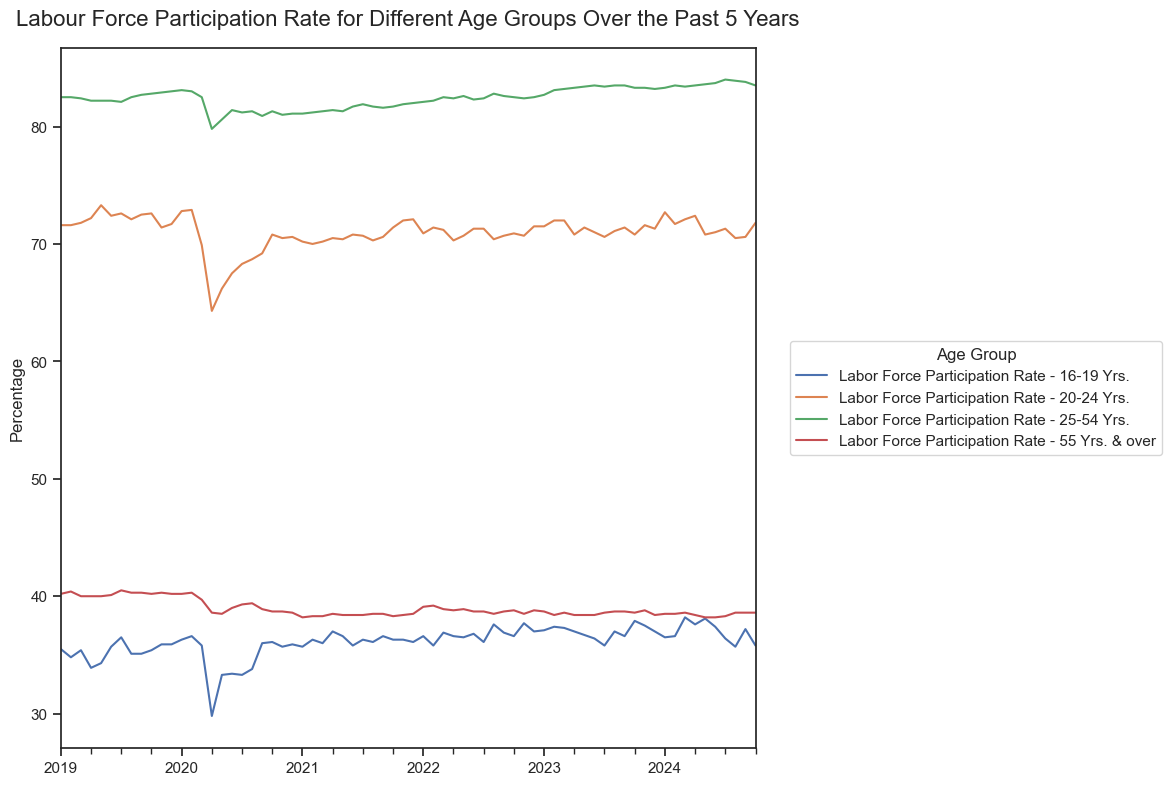

In [154]:
final_df.plot(kind='line', figsize=(12, 8))
plt.title('Labour Force Participation Rate for Different Age Groups Over the Past 5 Years', fontsize=16, y=1.02)
plt.ylabel('Percentage')

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0., title="Age Group")

plt.tight_layout()